<a href="https://colab.research.google.com/github/alex06733/Elektro/blob/main/Koeffizienten_Splines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

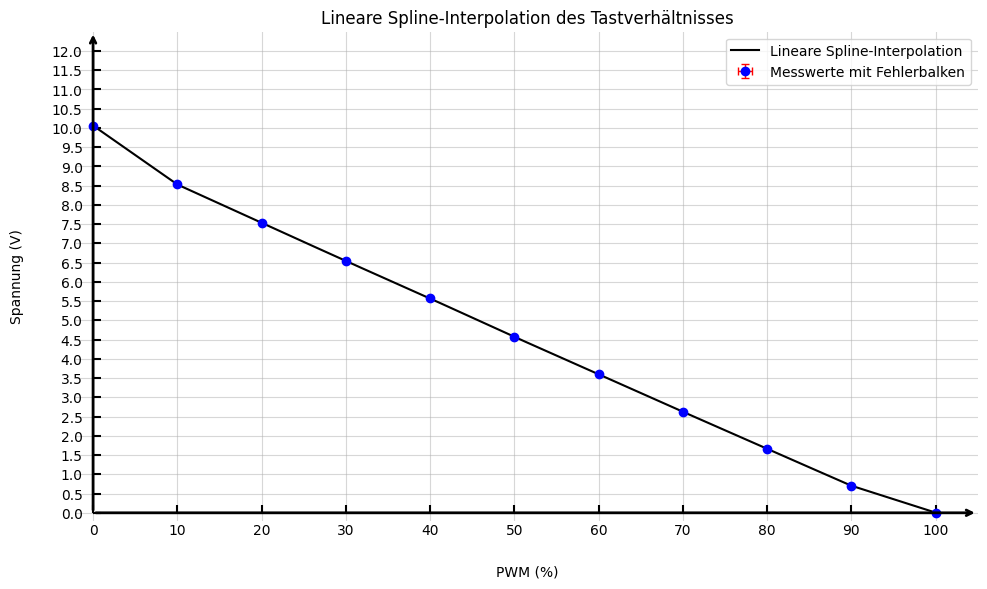

   x_start  x_end        m        b
0      0.0   10.0 -0.15310  10.0620
1     10.0   20.0 -0.09960   9.5270
2     20.0   30.0 -0.09910   9.5170
3     30.0   40.0 -0.09740   9.4660
4     40.0   50.0 -0.09970   9.5580
5     50.0   60.0 -0.09740   9.4430
6     60.0   70.0 -0.09720   9.4310
7     70.0   80.0 -0.09640   9.3750
8     80.0   90.0 -0.09580   9.3270
9     90.0  100.0 -0.06994   6.9996


In [116]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d
from matplotlib.ticker import MultipleLocator

# ----------------------
# 1) Daten & Fehlerbalken
# ----------------------
pwm = np.array([0.0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])  # PWM in %
voltage = np.array([
    10.062, 8.531, 7.535, 6.544, 5.57,
    4.573, 3.599, 2.627, 1.663, 0.705, 0.0056
])  # Spannung in V

# Fehlerbalken: 0,02% der Spannung und 0,1% der PWM
voltage_error = 0.0002 * voltage
pwm_error = 0.001 * pwm

# ----------------------
# 2) Lineare Interpolation
# ----------------------
linear_spline = interp1d(pwm, voltage, kind='linear')
pwm_fine = np.linspace(0, 100, 500)  # Feinere PWM-Werte
voltage_spline_fit = linear_spline(pwm_fine)

# ----------------------
# 3) Figur & Grund-Layout
# ----------------------
plt.figure(figsize=(10, 6))

# Wichtig: Ticks manuell setzen
# Keine negativen Y-Ticks; wir fangen bei 0 an und hören bei 12 auf
plt.xticks(np.arange(0, 110, 10))
plt.yticks(np.arange(0, 12.1, 0.5))  # 0, 0.5, 1.0, ..., 12.0

# ----------------------
# 4) Messwerte mit Fehlerbalken
# ----------------------
plt.errorbar(
    pwm,
    voltage,
    xerr=pwm_error,
    yerr=voltage_error,
    fmt='o',
    ecolor='red',
    elinewidth=1,
    capsize=3,
    label="Messwerte mit Fehlerbalken",
    color="blue"
)

# ----------------------
# 5) Lineare Spline-Kurve
# ----------------------
plt.plot(pwm_fine, voltage_spline_fit, label="Lineare Spline-Interpolation", color="black")

# Achsentitel, Plot-Titel, Legende, Gitter
plt.xlabel("PWM (%)", labelpad=20)
plt.ylabel("Spannung (V)", labelpad=20)
plt.title("Lineare Spline-Interpolation des Tastverhältnisses")
plt.legend()
plt.grid(zorder=0, alpha=0.5)

# ----------------------
# 6) Pfeile statt Standard-Achsen
# ----------------------
# Pfeil für x-Achse (bis x=105, etwas über 100 für den Pfeilkopf)
plt.annotate(
    '',
    xy=(105, 0),
    xytext=(0, 0),
    arrowprops=dict(arrowstyle='->', color='black', lw=2),
    zorder=10
)

# Pfeil für y-Achse (bis y=12.5, damit er über den letzten Tick hinausragt)
plt.annotate(
    '',
    xy=(0, 12.5),
    xytext=(0, 0),
    arrowprops=dict(arrowstyle='->', color='black', lw=2),
    zorder=10
)

# ----------------------
# 7) Achsen-Spines anpassen
# ----------------------
ax = plt.gca()

# Obere und rechte Achsenlinie ausblenden
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Linke (y-)Achse bei x=0 anzeigen
ax.spines['left'].set_position(('data', 0))
ax.spines['left'].set_visible(True)

# Nur von y=0 bis y=12 die Spine zeichnen
ax.spines['left'].set_bounds(0, 12)

# Untere (x-)Achse bei y=0 (Pfeil statt Achsenlinie)
ax.spines['bottom'].set_visible(False)
ax.spines['bottom'].set_position(('data', 0))
ax.spines['bottom'].set_bounds(0, 100)

# ----------------------
# 8) Achsenlimits
# ----------------------
# A) x bis 105 (für Pfeil) und links etwas Luft, damit x=0-Punkt ganz zu sehen ist
ax.set_xlim(-2, 105)

# B) y beginnt bei -0.2, damit der Marker bei y=0 komplett über der Achsenlinie liegt
#    Aber die Ticks starten erst bei 0 (siehe plt.yticks(...) oben), also keine negativen Beschriftungen
ax.set_ylim(-0.2, 12.5)

# ----------------------
# 9) Tick-Design
# ----------------------
ax.tick_params(axis='y', direction='in', length=6, width=1.5, colors='black', grid_alpha=0.5, pad=7.5)
ax.tick_params(axis='x', direction='in', length=6, width=1.5, colors='black', grid_alpha=0.5, pad=7.5)

# Falls man lieber noch feiner einstellen möchte (MultipleLocator etc.):
# from matplotlib.ticker import MultipleLocator
# ax.yaxis.set_major_locator(MultipleLocator(0.5))
# ax.yaxis.set_ticks_position('left')

# Layout anpassen & Plot anzeigen
plt.tight_layout()
plt.show()

# ----------------------
# 10) Stückweise lineare Koeffizienten ausgeben
# ----------------------
m_values = (voltage[1:] - voltage[:-1]) / (pwm[1:] - pwm[:-1])
b_values = voltage[:-1] - m_values * pwm[:-1]

coefficients = pd.DataFrame({
    "x_start": pwm[:-1],
    "x_end":   pwm[1:],
    "m":       m_values,
    "b":       b_values,
})

print(coefficients)






**Text fett markieren**# Neuer Abschnitt

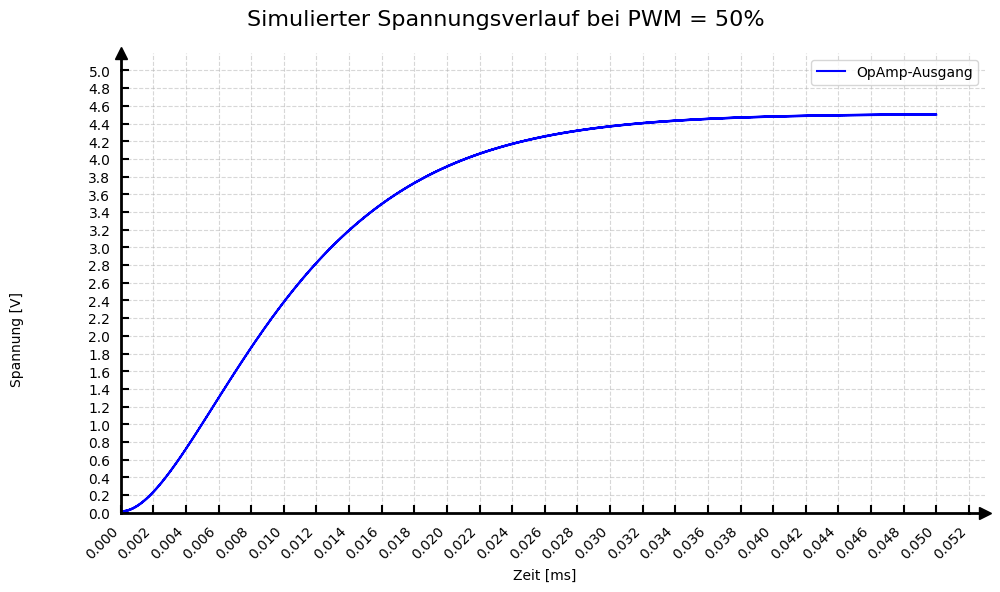

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

uploaded = files.upload()

# =================================================
# A) Beispieldaten laden
# =================================================
df = pd.read_csv("CircuitLab_simulation_2025-01-22T09_05_18.640Z.csv")

time = df["Time"]              # in [ms]
out_opamp = df["V(Out_OpAmp)"] # in [V]

# =================================================
# B) Festlegungen für Achsen / Ticks
# =================================================
# Manuelle "Achsen" von 0..0.052 mit Pfeil bei 0.053
x_line_end  = 0.052
x_arrow_end = 0.053

# y-Achse: 0..5.0 mit Pfeil bei 5.2
y_line_end  = 5.0
y_arrow_end = 5.2

# Schrittweiten
x_step = 0.002
y_step = 0.2

# Tick-Positionen
x_ticks = np.arange(0, x_line_end + x_step, x_step)
y_ticks = np.arange(0, y_line_end + y_step, y_step)

# Plotbereich
x_min, x_max = 0, x_arrow_end
y_min, y_max = 0, y_arrow_end

# =================================================
# C) Figure & Grundplot
# =================================================
fig, ax = plt.subplots(figsize=(10, 6))

# 1) Daten plotten
ax.plot(time, out_opamp, color="blue", label="OpAmp-Ausgang")

# 2) Standard-Spines ausschalten (wir zeichnen die Achsen selbst)
ax.spines["top"].set_color("none")
ax.spines["right"].set_color("none")
ax.spines["bottom"].set_color("none")
ax.spines["left"].set_color("none")

# 3) Tick-Positionen + Grid
ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)
# Beschriftungen definieren wir manuell,
# damit wir z.B. 3 Nachkommastellen für x und 1 für y haben:
ax.set_xticklabels([f"{xt:.3f}" for xt in x_ticks])
ax.set_yticklabels([f"{yt:.1f}" for yt in y_ticks])

ax.grid(True, which="major", axis="both", linestyle="--", alpha=0.7)

# 4) Grenzen des Datenbereichs
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

# =================================================
# D) Achsenlinien + Pfeile manuell zeichnen
# =================================================

# X-Achse (dicke Linie)
ax.plot([0, x_line_end], [0, 0], lw=2, color="k", clip_on=False)
# Pfeil: kleines Stück von 0.052..0.053
ax.plot([x_line_end, x_arrow_end], [0, 0],
        lw=2, color="k",
        marker=">", markersize=8,
        markevery=[1], clip_on=False)

# Y-Achse (dicke Linie)
ax.plot([0, 0], [0, y_line_end], lw=2, color="k", clip_on=False)
# Pfeil: kleines Stück von 5.0..5.2
ax.plot([0, 0], [y_line_end, y_arrow_end],
        lw=2, color="k",
        marker="^", markersize=8,
        markevery=[1], clip_on=False)

# =================================================
# E) Ticks nach innen + Beschriftungen außen
# =================================================

# Mit tick_params sagen wir, wie die Ticks gezeichnet werden sollen.
# "pad" steuert den Abstand der Zahlen zur Achsenlinie (d.h. nach außen).
ax.tick_params(axis='both',    # x & y
               direction='in', # Ticks zeigen nach innen
               length=6,       # Pixel-Länge der Tick-Striche
               width=1.5,
               colors='black',
               grid_alpha=0.5,
               pad=7.5)        # Abstand der Zahlen nach außen

# Falls die x-Beschriftungen eng beieinander liegen, kann man sie z.B. drehen:
plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

# =================================================
# F) Achsen-Beschriftungen (Labels)
#    Zentral auf der Achse
# =================================================
# X-Achse
ax.text(x_line_end / 2.0, -0.12*(y_max - y_min),
        "Zeit [ms]", ha="center", va="top")

# Y-Achse
ax.text(-0.12*(x_max - x_min), y_line_end / 2.0,
        "Spannung [V]", rotation=90, ha="center", va="top")

# =================================================
# G) Legende & Layout
# =================================================
fig.suptitle("Simulierter Spannungsverlauf bei PWM = 50%",fontsize=16)
ax.legend()
plt.tight_layout()
plt.show()


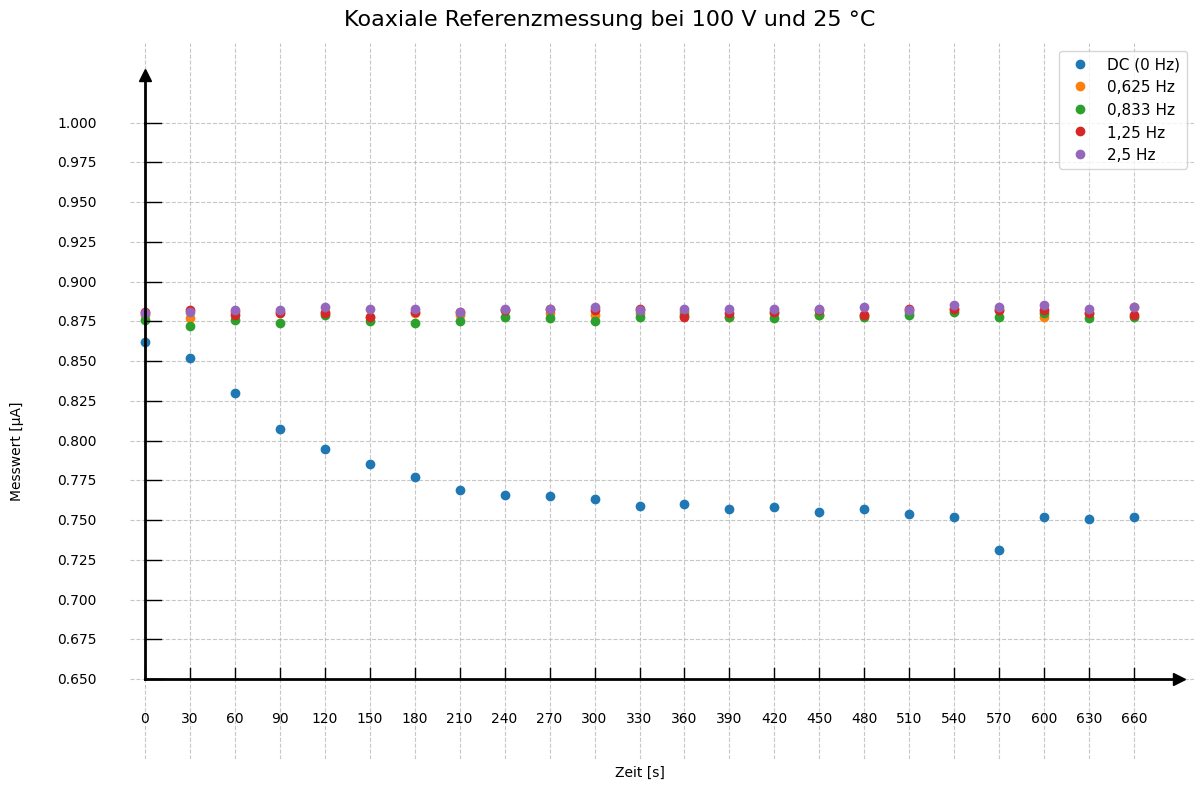

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------------------------------------
# A) Zeitwerte (in Sekunden) und Messdaten
# -------------------------------------------------------------
time_s = [
    0, 30, 60, 90, 120, 150, 180, 210, 240, 270,
    300, 330, 360, 390, 420, 450, 480, 510, 540, 570,
    600, 630, 660
]

dc = [
    0.862, 0.852, 0.830, 0.807, 0.795, 0.785, 0.777, 0.769, 0.766, 0.765,
    0.763, 0.759, 0.760, 0.757, 0.758, 0.755, 0.757, 0.754, 0.752, 0.731,
    0.752, 0.751, 0.752
]

i_0625 = [
    0.879, 0.877, 0.881, 0.881, 0.881, 0.878, 0.880, 0.879, 0.882, 0.880,
    0.879, 0.880, 0.881, 0.878, 0.880, 0.879, 0.879, 0.881, 0.883, 0.882,
    0.878, 0.880, 0.884
]

i_0833 = [
    0.876, 0.872, 0.876, 0.874, 0.879, 0.875, 0.874, 0.875, 0.878, 0.877,
    0.875, 0.878, 0.879, 0.878, 0.877, 0.879, 0.878, 0.879, 0.881, 0.878,
    0.880, 0.877, 0.878
]

i_125 = [
    0.881, 0.882, 0.879, 0.880, 0.880, 0.878, 0.881, 0.881, 0.882, 0.883,
    0.882, 0.883, 0.878, 0.880, 0.881, 0.882, 0.879, 0.883, 0.883, 0.882,
    0.882, 0.880, 0.879
]

i_25 = [
    0.880, 0.881, 0.882, 0.882, 0.884, 0.883, 0.883, 0.881, 0.883, 0.883,
    0.884, 0.882, 0.883, 0.883, 0.883, 0.883, 0.884, 0.882, 0.885, 0.884,
    0.885, 0.883, 0.884
]

# -------------------------------------------------------------
# B) Achsen: Treffpunkt (0,0.65). Pfeile bis x=690, y=1.03
# -------------------------------------------------------------
x_line_start = 0
x_line_end   = 660
x_arrow_end  = 690

y_line_start = 0.65
y_line_end   = 1.0
y_arrow_end  = 1.03

# Plot soll Bereich x=-10..700, y=0.60..1.05 anzeigen
x_min_plot = -10
x_max_plot = 700
y_min_plot = 0.60
y_max_plot = 1.05

# -------------------------------------------------------------
# C) Figure & Plot
# -------------------------------------------------------------
fig, ax = plt.subplots(figsize=(12, 8))

# Datenpunkte
ax.plot(time_s, dc,     'o', label="DC (0 Hz)")
ax.plot(time_s, i_0625, 'o', label="0,625 Hz")
ax.plot(time_s, i_0833, 'o', label="0,833 Hz")
ax.plot(time_s, i_125,  'o', label="1,25 Hz")
ax.plot(time_s, i_25,   'o', label="2,5 Hz")

# Plotbereich
ax.set_xlim(x_min_plot, x_max_plot)
ax.set_ylim(y_min_plot, y_max_plot)

# Alle Spines unsichtbar
for spine in ["top", "right", "bottom", "left"]:
    ax.spines[spine].set_color("none")

# Alle automatischen Ticks entfernen (Major + Minor)
ax.tick_params(axis='both', which='both', length=0)

# -------------------------------------------------------------
# D) Pfeil-Achsen manuell
# -------------------------------------------------------------
# Waagerechte x-Achse: (0,0.65) -> (660,0.65), Pfeil -> (690,0.65)
ax.plot([x_line_start, x_line_end], [y_line_start, y_line_start],
        color='k', linewidth=2, clip_on=False)
ax.plot([x_line_end, x_arrow_end], [y_line_start, y_line_start],
        color='k', linewidth=2,
        marker='>', markersize=8, markevery=[1],
        clip_on=False)

# Senkrechte y-Achse: (0,0.65) -> (0,1.0), Pfeil -> (0,1.03)
ax.plot([x_line_start, x_line_start], [y_line_start, y_line_end],
        color='k', linewidth=2, clip_on=False)
ax.plot([x_line_start, x_line_start], [y_line_end, y_arrow_end],
        color='k', linewidth=2,
        marker='^', markersize=8, markevery=[1],
        clip_on=False)

# -------------------------------------------------------------
# E) Manuelle Ticks in 30er-Schritten (X) und 0.025er-Schritten (Y)
# -------------------------------------------------------------
x_ticks = np.arange(0, x_line_end+1, 30)  # 0, 30, 60, ..., 660
y_ticks = np.arange(0.65, 1.0001, 0.025)  # 0.65, 0.675, 0.70 ...

tick_fraction = 0.015
tick_len_x = tick_fraction * (y_max_plot - y_min_plot)  # nach oben
tick_len_y = tick_fraction * (x_max_plot - x_min_plot)  # nach rechts

# X-Ticks
for xt in x_ticks:
    ax.plot([xt, xt],
            [y_line_start, y_line_start + tick_len_x],
            color="k", lw=1)
    ax.text(xt, y_line_start - 3*tick_len_x,
            f"{xt}", ha="center", va="top")

# Y-Ticks
for yt in y_ticks:
    ax.plot([x_line_start, x_line_start + tick_len_y],
            [yt, yt],
            color="k", lw=1)
    ax.text(x_line_start - 3*tick_len_y, yt,
            f"{yt:.3f}", ha="right", va="center")

# -------------------------------------------------------------
# F) Achsenbeschriftungen
# -------------------------------------------------------------
ax.text((x_line_start + x_line_end)/2,
        y_line_start - 8*tick_len_x,
        "Zeit [s]", ha="center", va="top")

ax.text(x_line_start - 8*tick_len_y,
        (y_line_start + y_line_end)/2,
        "Messwert [µA]",
        rotation=90, ha="center", va="top")

# -------------------------------------------------------------
# G) Gitter & Legende
# -------------------------------------------------------------
# Wir lassen das Grid an genau unseren manuell definierten Werten
ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)
ax.set_xticklabels([])  # keine auto-beschriftung
ax.set_yticklabels([])

ax.grid(True, which="major", linestyle="--", alpha=0.7)

# Legende oben rechts
ax.legend(loc="upper right", fontsize=11)
fig.suptitle("Koaxiale Referenzmessung bei 100 V und 25 °C",fontsize=16)
plt.tight_layout()
plt.show()


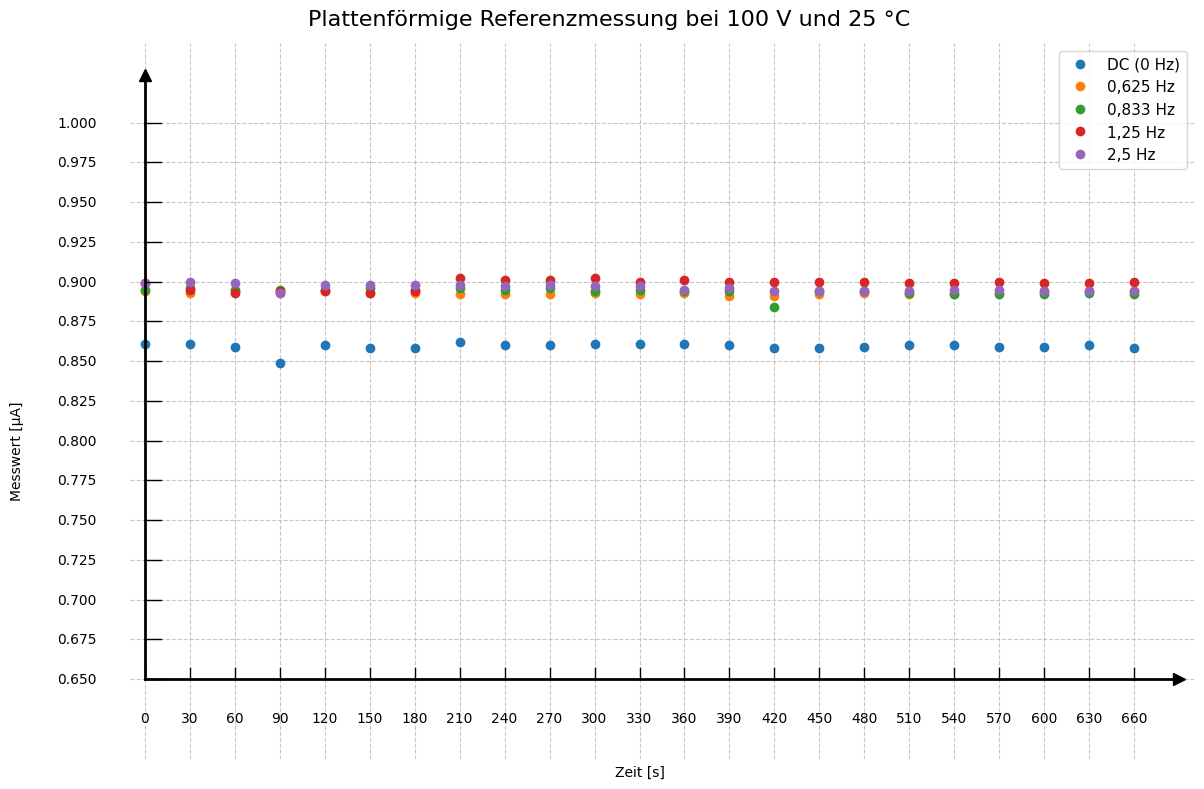

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------------------------------------
# A) Zeitwerte (in Sekunden) und Messdaten (Platten-Anordnung)
# -------------------------------------------------------------
time_s = [
    0, 30, 60, 90, 120, 150, 180, 210, 240, 270,
    300, 330, 360, 390, 420, 450, 480, 510, 540, 570,
    600, 630, 660
]

dc = [
    0.861, 0.861, 0.859, 0.849, 0.860, 0.858, 0.858, 0.862, 0.860, 0.860,
    0.861, 0.861, 0.861, 0.860, 0.858, 0.858, 0.859, 0.860, 0.860, 0.859,
    0.859, 0.860, 0.858
]

i_0625 = [
    0.894, 0.893, 0.894, 0.893, 0.894, 0.893, 0.893, 0.892, 0.892, 0.892,
    0.893, 0.892, 0.893, 0.891, 0.891, 0.892, 0.893, 0.892, 0.892, 0.893,
    0.894, 0.894, 0.894
]

i_0833 = [
    0.895, 0.896, 0.895, 0.895, 0.895, 0.896, 0.895, 0.896, 0.895, 0.896,
    0.894, 0.895, 0.894, 0.894, 0.884, 0.894, 0.894, 0.893, 0.892, 0.892,
    0.892, 0.893, 0.892
]

i_125 = [
    0.899, 0.895, 0.893, 0.894, 0.894, 0.893, 0.894, 0.902, 0.901, 0.901,
    0.902, 0.900, 0.901, 0.900, 0.900, 0.900, 0.900, 0.899, 0.899, 0.900,
    0.899, 0.899, 0.900
]

i_25 = [
    0.899, 0.900, 0.899, 0.893, 0.898, 0.898, 0.898, 0.898, 0.897, 0.898,
    0.897, 0.897, 0.895, 0.896, 0.894, 0.894, 0.894, 0.894, 0.895, 0.895,
    0.894, 0.894, 0.894
]

# -------------------------------------------------------------
# B) Festlegung der Achsen (gleicher „Eckpunkt“ wie vorher)
# -------------------------------------------------------------
x_line_start = 0
x_line_end   = 660
x_arrow_end  = 690

y_line_start = 0.65
y_line_end   = 1.0
y_arrow_end  = 1.03

# Plotbereich etwas größer, damit Pfeile sichtbar sind
x_min_plot = -10
x_max_plot = 700
y_min_plot = 0.60
y_max_plot = 1.05

# -------------------------------------------------------------
# C) Figure & Plot
# -------------------------------------------------------------
fig, ax = plt.subplots(figsize=(12, 8))

# Plot der Datenpunkte
ax.plot(time_s, dc,     'o', label="DC (0 Hz)")
ax.plot(time_s, i_0625, 'o', label="0,625 Hz")
ax.plot(time_s, i_0833, 'o', label="0,833 Hz")
ax.plot(time_s, i_125,  'o', label="1,25 Hz")
ax.plot(time_s, i_25,   'o', label="2,5 Hz")

# Plotgrenzen
ax.set_xlim(x_min_plot, x_max_plot)
ax.set_ylim(y_min_plot, y_max_plot)

# Alle Spines unsichtbar
for spine in ["top", "right", "bottom", "left"]:
    ax.spines[spine].set_color("none")

# Alle auto-Ticks entfernen (Major + Minor)
ax.tick_params(axis='both', which='both', length=0)

# -------------------------------------------------------------
# D) Pfeil-Achsen manuell zeichnen
# -------------------------------------------------------------
# X-Achse: (0, 0.65) -> (660, 0.65), Pfeil -> (690, 0.65)
ax.plot([x_line_start, x_line_end], [y_line_start, y_line_start],
        color='k', linewidth=2, clip_on=False)
ax.plot([x_line_end, x_arrow_end], [y_line_start, y_line_start],
        color='k', linewidth=2,
        marker='>', markersize=8, markevery=[1],
        clip_on=False)

# Y-Achse: (0, 0.65) -> (0, 1.0), Pfeil -> (0, 1.03)
ax.plot([x_line_start, x_line_start], [y_line_start, y_line_end],
        color='k', linewidth=2, clip_on=False)
ax.plot([x_line_start, x_line_start], [y_line_end, y_arrow_end],
        color='k', linewidth=2,
        marker='^', markersize=8, markevery=[1],
        clip_on=False)

# -------------------------------------------------------------
# E) Manuelle Ticks
#    -> X in 30er-Schritten (0..660), Y in 0.025er-Schritten (0.65..1.0)
# -------------------------------------------------------------
x_ticks = np.arange(0, x_line_end+1, 30)        # 0,30,60..660
y_ticks = np.arange(0.65, 1.00001, 0.025)       # 0.65,0.675,0.70..1.0

tick_fraction = 0.015
tick_len_x = tick_fraction * (y_max_plot - y_min_plot)  # Ticks nach oben
tick_len_y = tick_fraction * (x_max_plot - x_min_plot)  # Ticks nach rechts

# X-Ticks
for xt in x_ticks:
    ax.plot([xt, xt],
            [y_line_start, y_line_start + tick_len_x],
            color="k", lw=1)
    ax.text(xt, y_line_start - 3*tick_len_x,
            f"{xt}", ha="center", va="top")

# Y-Ticks
for yt in y_ticks:
    ax.plot([x_line_start, x_line_start + tick_len_y],
            [yt, yt],
            color="k", lw=1)
    ax.text(x_line_start - 3*tick_len_y, yt,
            f"{yt:.3f}", ha="right", va="center")

# -------------------------------------------------------------
# F) Achsenbeschriftungen
# -------------------------------------------------------------
# X-Achse
ax.text((x_line_start + x_line_end)/2,
        y_line_start - 8*tick_len_x,
        "Zeit [s]", ha="center", va="top")

# Y-Achse
ax.text(x_line_start - 8*tick_len_y,
        (y_line_start + y_line_end)/2,
        "Messwert [µA]", rotation=90, ha="center", va="top")

# -------------------------------------------------------------
# G) Gitter & Legende
# -------------------------------------------------------------
# Gitter an genau unseren Ticks
ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)
ax.set_xticklabels([])
ax.set_yticklabels([])

ax.grid(True, which="major", linestyle="--", alpha=0.7)

# Legende oben rechts
ax.legend(loc="upper right", fontsize=11)
fig.suptitle("Plattenförmige Referenzmessung bei 100 V und 25 °C",fontsize=16)
plt.tight_layout()
plt.show()
